# Convolutional Neural Network with Keras (FindMyLeaf)

---

# Image Data Extraction

1. Importing the train, test and validation set images from their respective folders
2. Converting them into their respective batches
3. Plotting some of the images from the train set along with their labels

In [1]:
# Importing all the Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import cv2
import scipy.ndimage

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from utils import *

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Setting up the paths for train, test and validate images

train_path = '../Data/train'
valid_path = '../Data/val'
test_path = '../Data/test'

In [3]:
# Importing the images to corresponding batches

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), 
                                                         classes=['1','2','3','4','5','6','7','8','9','10'], batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), 
                                                        classes=['1','2','3','4','5','6','7','8','9','10'], batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), 
                                                        classes=['1','2','3','4','5','6','7','8','9','10'], batch_size=10)

Found 3900 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [4]:
# Plotting some of the Train images with labels

def plots(ims, figsize=(18,12), rows=2, interp=False, titles=None):
    
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 == 0 else len(ims) // rows + 1
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')
        plt.tight_layout()

In [5]:
# Getting the Images and labels from train batches

imgs, labels = next(train_batches)

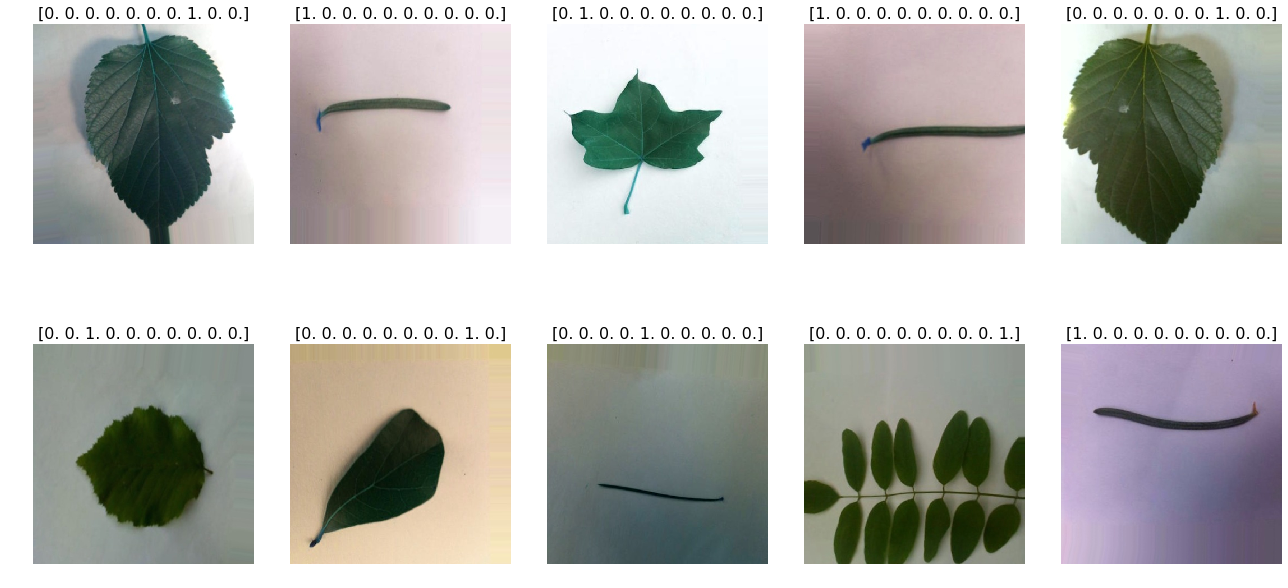

In [6]:
# Plotting the images

plots(imgs, titles=labels)

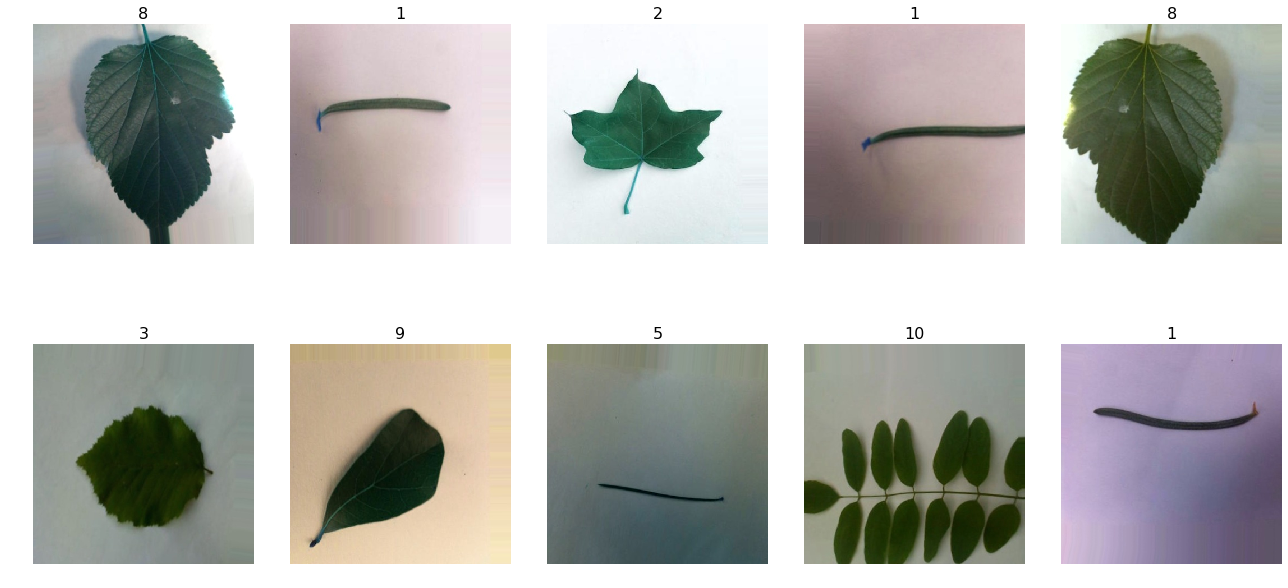

In [7]:
# Plotting the images with actual labels

labels_list = []
for i in labels:
    for k in range(len(i)):
        if i[k] == 1:
            labels_list.append(k+1)
            
plots(imgs, titles=labels_list)

---

## Image Preprocessing takes place in 3 steps:-

1. Converting the Images from BGR to HSV space
2. After that segmenting it using "Watershed Algorithm"
3. Finally, Noise removal using "Morphological Closing" Technique

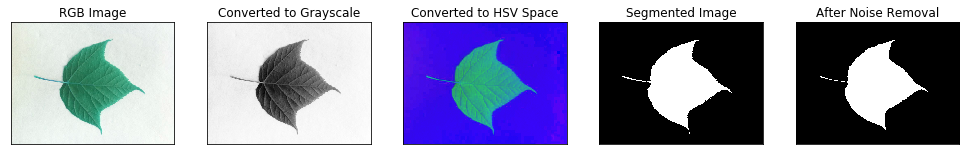

In [8]:
# Image Preprocessing for a sample leaf

image_RGB = cv2.imread('../sample.jpg', 1)

# 1. Converting RGB to HSV Space
image_HSV = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2HSV)

# 2. Converting RGB to GrayScale
image_GRAY = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)

# 3. Segmentation using "Watershed Algorithm"
ret, thresh = cv2.threshold(image_GRAY,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# 4. Noise removal using "Morphological Closing"

# Closing operation 
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, 
                            kernel, iterations = 2) 
  
# Background area using Dialation 
bg = cv2.dilate(closing, kernel, iterations = 1) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.01
                        * dist_transform.max(), 255, 0) 


# Plotting all the plots

f, ax = plt.subplots(1,5, figsize=(17,17))
ax[0].imshow(image_RGB, cmap='Greys_r')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].set_title('RGB Image')

ax[1].imshow(image_GRAY, cmap='Greys_r')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].set_title('Converted to Grayscale')

ax[2].imshow(image_HSV, cmap='Greys_r')
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[2].set_title('Converted to HSV Space')

ax[3].imshow(thresh, cmap='Greys_r')
ax[3].set_xticks([]), ax[3].set_yticks([])
ax[3].set_title('Segmented Image')

ax[4].imshow(fg, cmap='Greys_r')
ax[4].set_xticks([]), ax[4].set_yticks([])
ax[4].set_title('After Noise Removal')

plt.show()

Found 3900 images belonging to 10 classes.
Found 210 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


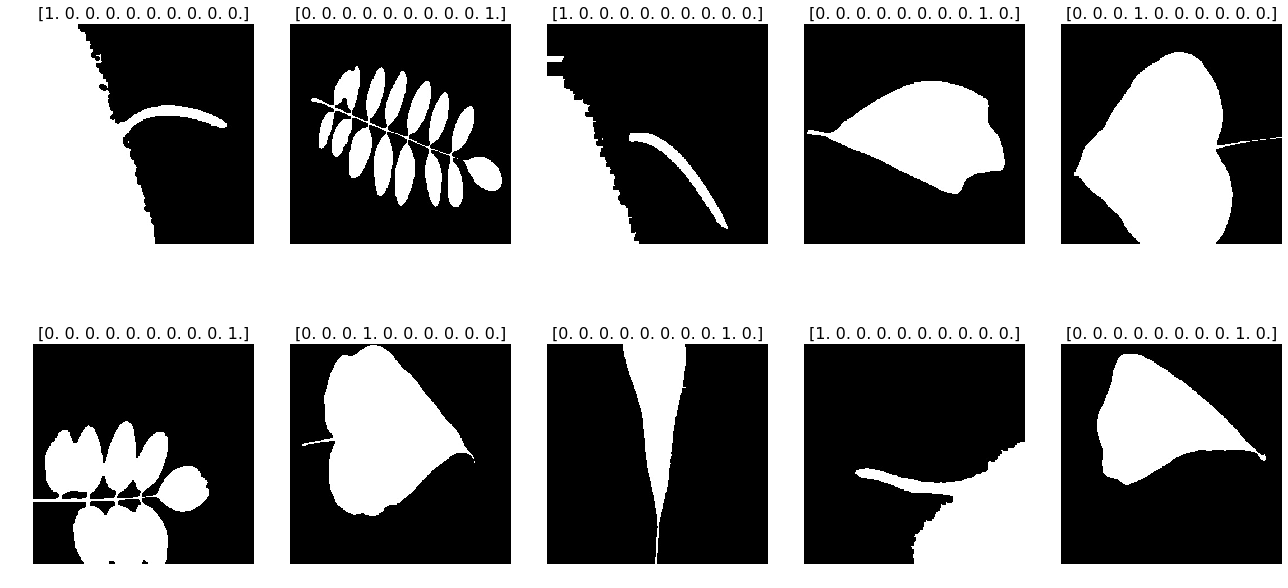

In [9]:
# After Preprocessing the images
# 1. Converting from BGR to HSV space
# 2. After that segmenting it using "Watershed Algorithm"

train_segmented_path = '../Data/train_segmented/'
valid_segmented_path = '../Data/valid_segmented/'
test_segmented_path = '../Data/test_segmented/'

train_batches = ImageDataGenerator().flow_from_directory(train_segmented_path, target_size=(224,224), 
                                                         classes=['1','2','3','4','5','6','7','8','9','10'], batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_segmented_path, target_size=(224,224), 
                                                        classes=['1','2','3','4','5','6','7','8','9','10'], batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(test_segmented_path, target_size=(224,224), 
                                                        classes=['1','2','3','4','5','6','7','8','9','10'], batch_size=10)

imgs, labels = next(train_batches)
plots(imgs, titles=labels)

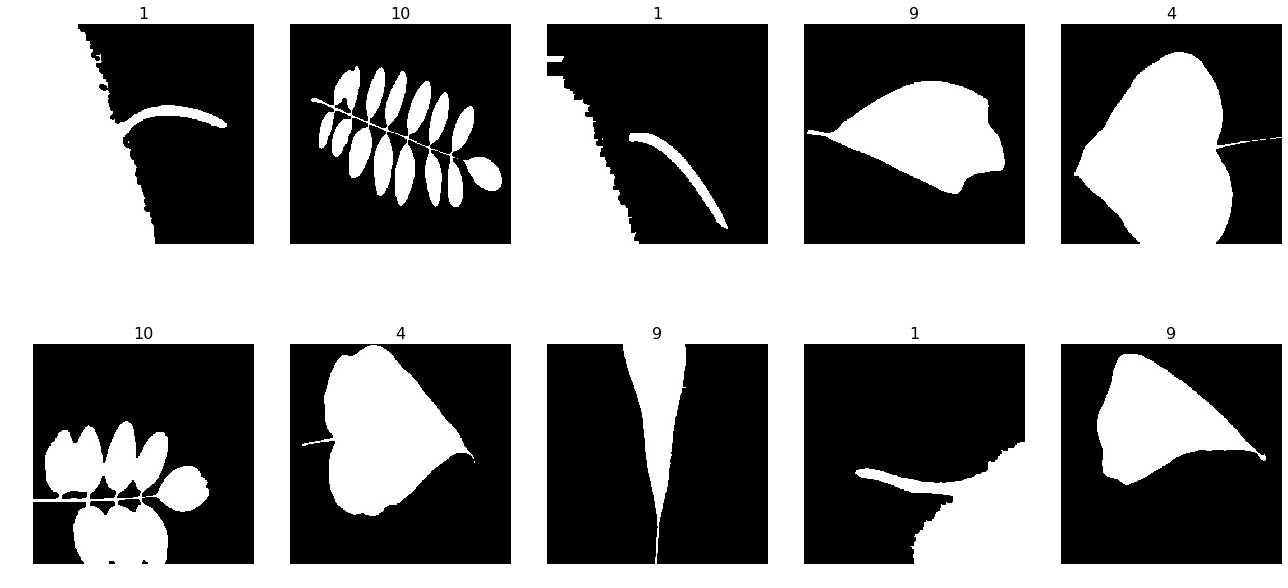

In [10]:
# Plotting the images with actual labels

labels_list = []
for i in labels:
    for k in range(len(i)):
        if i[k] == 1:
            labels_list.append(k+1)
            
plots(imgs, titles=labels_list)

---

# Building the CNN with VGG16

In [11]:
# Loading our VGG 16 model

vgg16_model = keras.applications.vgg16.VGG16()

In [12]:
# Model Architecture

vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
# Looking at the type of VGG16 model
# Not a Sequential Model

type(vgg16_model)

keras.engine.training.Model

In [14]:
# Converting VGG16 into a Sequential Model

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [15]:
# Adding our own last layer since VGG16 is a 1000 class classifier
# We want to add 10 class classifier

# Freezing all the other layers except the last one
for layer in model.layers:
    layer.trainable = False

# Adding our last layer
model.add(Dense(10, activation='softmax'))

In [16]:
# Looking at the summary of our FINAL Model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

---

# Train the Fine Tuned VGG16 Model

In [17]:
# Compiling our model with Adam Optimization and categorical_crossentropy loss

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(train_batches, steps_per_epoch=4,
                    validation_data=valid_batches, validation_steps=4, epochs=30, verbose=2)

Epoch 1/30
 - 4s - loss: 3.4522 - acc: 0.0750 - val_loss: 3.9185 - val_acc: 0.1500
Epoch 2/30
 - 1s - loss: 3.4694 - acc: 0.0750 - val_loss: 3.1734 - val_acc: 0.1250
Epoch 3/30
 - 1s - loss: 2.7289 - acc: 0.1250 - val_loss: 3.0969 - val_acc: 0.0750
Epoch 4/30
 - 1s - loss: 2.6343 - acc: 0.1500 - val_loss: 2.7773 - val_acc: 0.1250
Epoch 5/30
 - 1s - loss: 2.2529 - acc: 0.2250 - val_loss: 2.3378 - val_acc: 0.1250
Epoch 6/30
 - 1s - loss: 2.3359 - acc: 0.2000 - val_loss: 2.2374 - val_acc: 0.1750
Epoch 7/30
 - 1s - loss: 2.2318 - acc: 0.4000 - val_loss: 2.5276 - val_acc: 0.1500
Epoch 8/30
 - 1s - loss: 2.5238 - acc: 0.1250 - val_loss: 2.1814 - val_acc: 0.2500
Epoch 9/30
 - 1s - loss: 1.5933 - acc: 0.4500 - val_loss: 1.6865 - val_acc: 0.3750
Epoch 10/30
 - 1s - loss: 1.6083 - acc: 0.5000 - val_loss: 1.6128 - val_acc: 0.4750
Epoch 11/30
 - 1s - loss: 1.3263 - acc: 0.6000 - val_loss: 1.6728 - val_acc: 0.3500
Epoch 12/30
 - 1s - loss: 1.1069 - acc: 0.6750 - val_loss: 1.6072 - val_acc: 0.5000
E

---

# Predicting using Fine Tuned VGG16¶

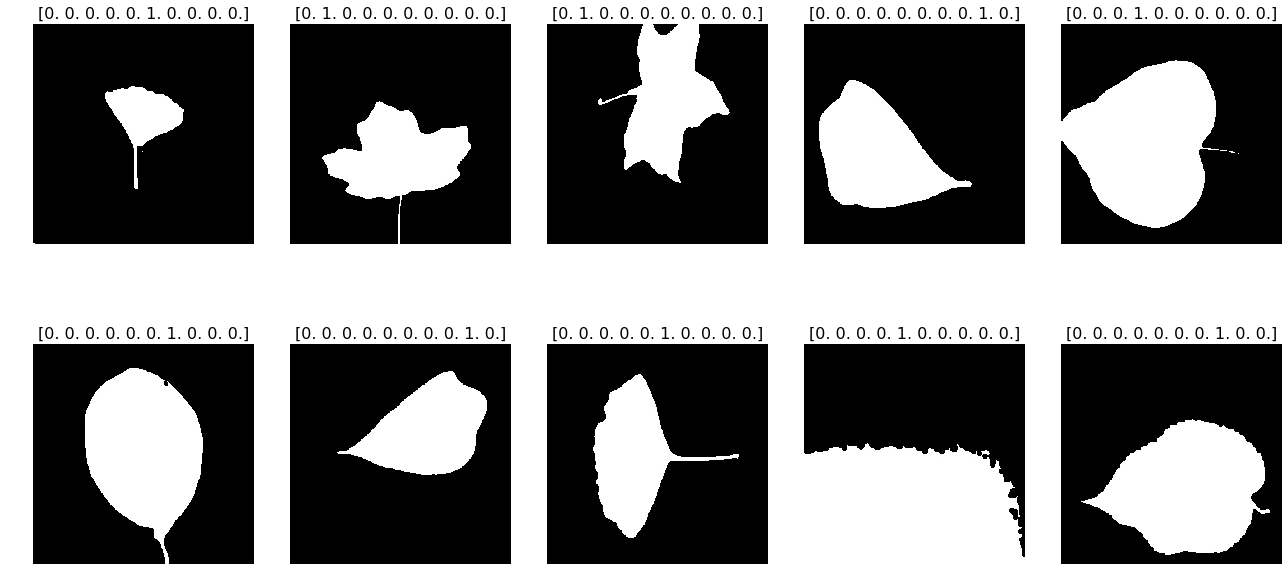

In [19]:
# Getting the Images and labels from test batches and Plotting the images

test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [20]:
# Predictions

predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [21]:
# Converting One Hot Values for Predictions and Test labels into 'Integers' for confusion matrix

predictions_i = [np.argmax(r)+1 for r in predictions]
test_labels_i = [np.argmax(r)+1 for r in test_labels]

In [22]:
# Calculating our confusion matrix

    
cm = confusion_matrix(test_labels_i, predictions_i)

In [23]:
# Function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1]]


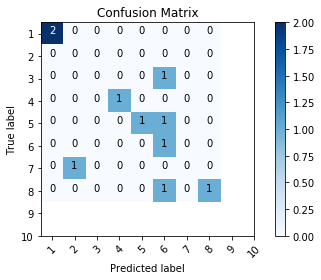

In [24]:
# Plotting our Confusion Matrix

cm_plot_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [25]:
# Saving our Model

model.save('Fine_Tuned_VGG16.h5')

---